In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import calendar

In [2]:

data = pd.read_csv("/home/sanjeevpatil/End-to-End Hotel Reservation Prediction/Artifacts/11_02_2025_19_50_14/data_ingestion/feature_store/HotelReservation.csv")
df=data.copy()


FileNotFoundError: [Errno 2] No such file or directory: '/home/sanjeevpatil/End-to-End Hotel Reservation Prediction/Artifacts/11_02_2025_19_50_14/data_ingestion/feature_store/HotelReservation.csv'

In [ ]:
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [ ]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
df.drop(columns=['Booking_ID'], inplace=True)




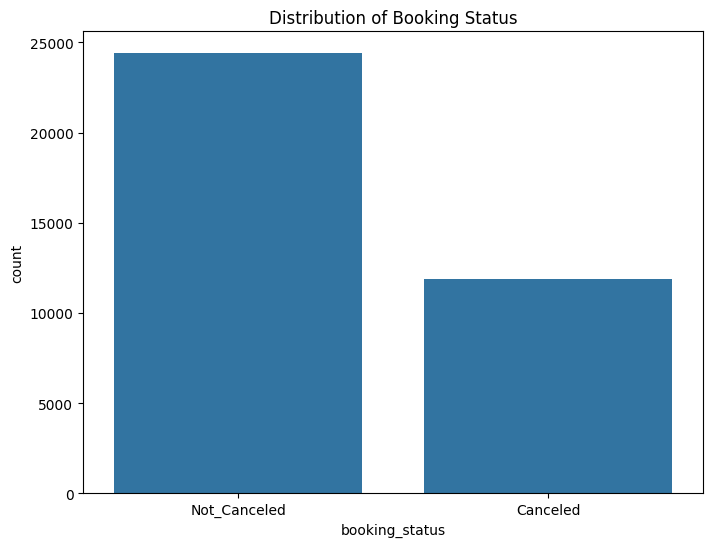

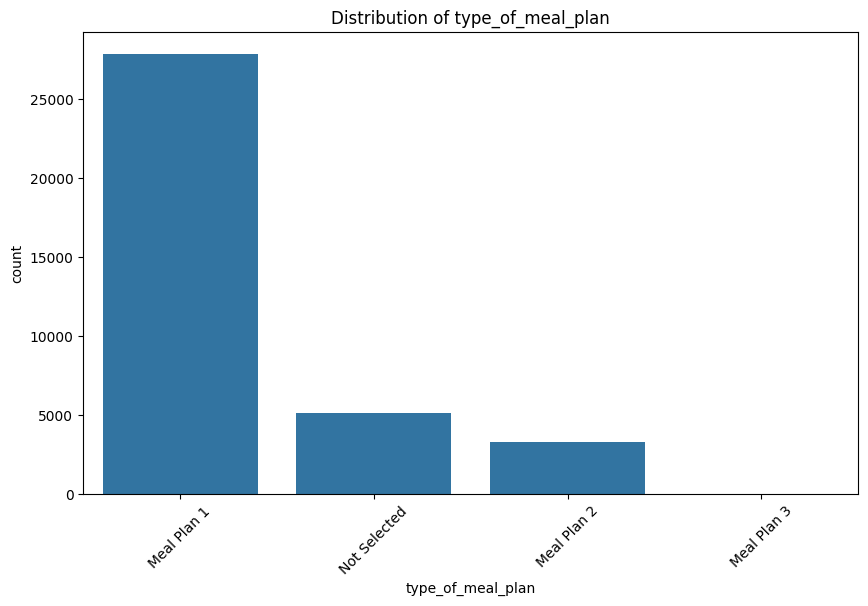

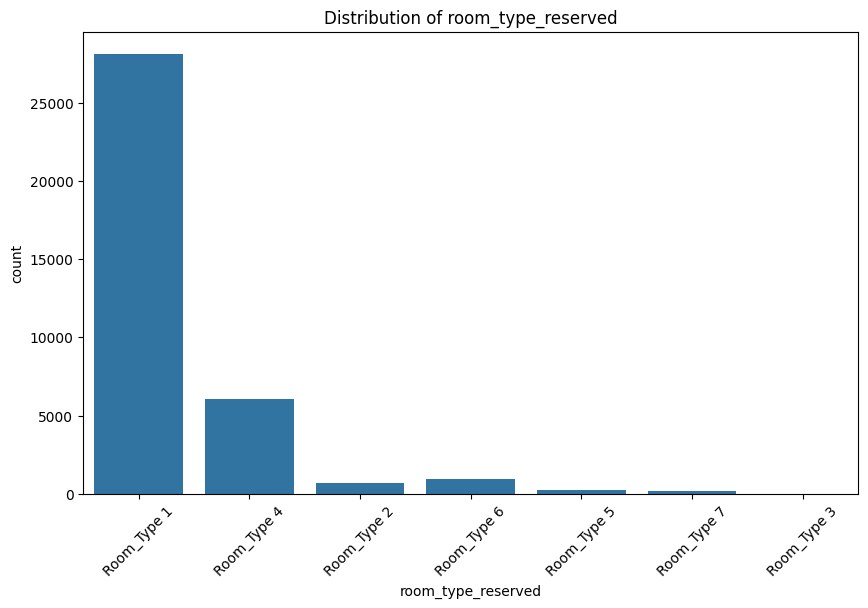

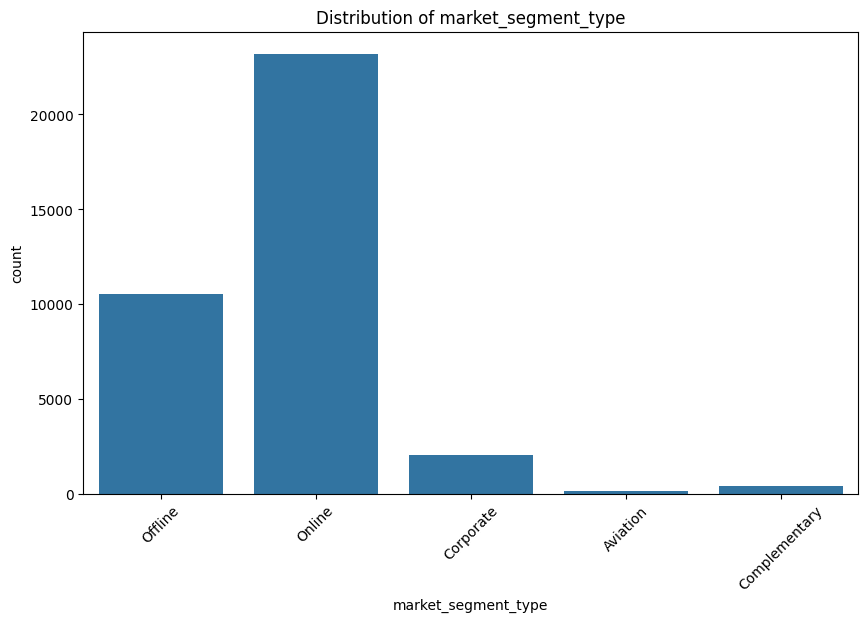

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='booking_status')
plt.title('Distribution of Booking Status')
plt.show()

# Distribution of categorical features
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

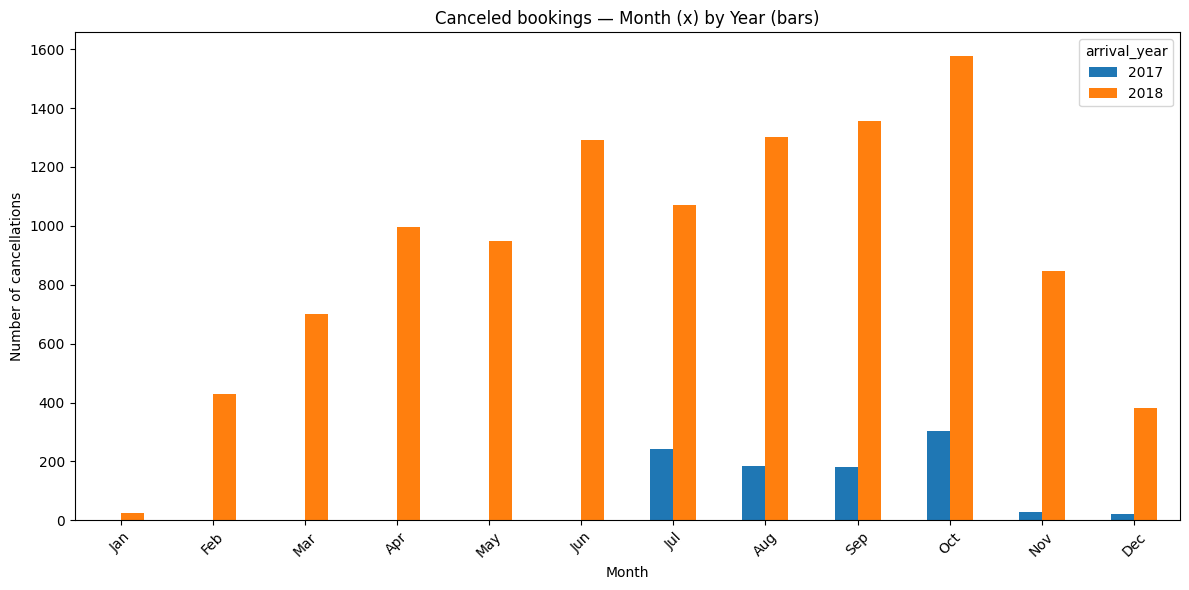

In [ ]:
# cancellations count per month for each year
canceled = df[df['booking_status']=='Canceled']
counts = canceled.groupby(['arrival_month','arrival_year']).size().unstack(fill_value=0)
counts.index = counts.index.map(lambda m: calendar.month_abbr[int(m)])
counts.plot(kind='bar', figsize=(12,6))
plt.title('Canceled bookings — Month (x) by Year (bars)')
plt.ylabel('Number of cancellations')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


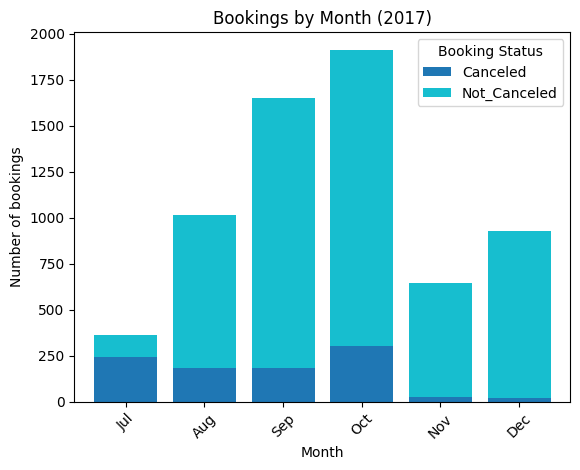

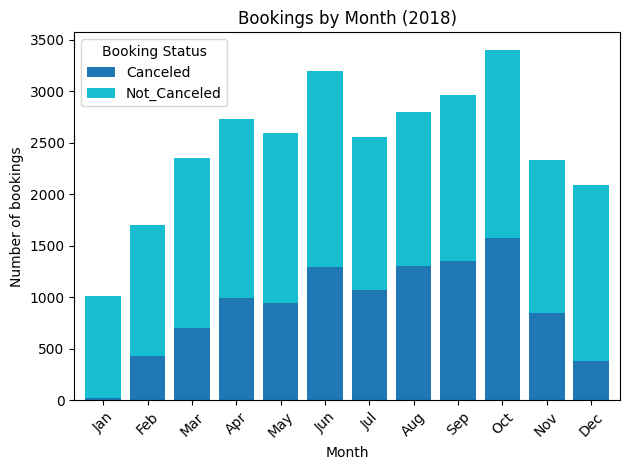

In [ ]:

data_2017 = df[df['arrival_year'] == 2017].copy()
monthly_counts_2017 = data_2017.groupby(['arrival_month', 'booking_status']).size().unstack(fill_value=0).sort_index()
monthly_counts_2017.index = monthly_counts_2017.index.map(lambda m: calendar.month_abbr[int(m)])
monthly_counts_2017.plot(kind='bar', stacked=True, colormap='tab10', width=0.8)
plt.title('Bookings by Month (2017)')
plt.xlabel('Month')
plt.ylabel('Number of bookings')
plt.xticks(rotation=45)
plt.legend(title='Booking Status')



data_2018 = df[df['arrival_year'] == 2018].copy()
monthly_counts_2018 = data_2018.groupby(['arrival_month', 'booking_status']).size().unstack(fill_value=0).sort_index()
monthly_counts_2018.index = monthly_counts_2018.index.map(lambda m: calendar.month_abbr[int(m)])
monthly_counts_2018.plot(kind='bar', stacked=True, colormap='tab10', width=0.8)
plt.title('Bookings by Month (2018)')
plt.xlabel('Month')
plt.ylabel('Number of bookings')
plt.xticks(rotation=45)
plt.legend(title='Booking Status')

plt.tight_layout()
plt.show()

In [ ]:
## Summary 
print("\nBooking Statistics:")
print("2017 Total Bookings:", data_2017.shape[0])
print("2017 Cancellation Rate: {:.2%}".format(
    (data_2017['booking_status']=='Canceled').mean()))
print("\n2018 Total Bookings:", data_2018.shape[0])
print("2018 Cancellation Rate: {:.2%}".format(
    (data_2018['booking_status']=='Canceled').mean()))


Booking Statistics:
2017 Total Bookings: 6514
2017 Cancellation Rate: 14.75%

2018 Total Bookings: 29761
2018 Cancellation Rate: 36.71%


# Booking Patterns & Key Metrics

## Yearly Growth
- **2017:** 6,514 total bookings  
- **2018:** 29,761 total bookings  
- **Growth:** 357% increase year-over-year

## Cancellation Trends

### Overall Dataset Split
- **Not Canceled:** 71%  
- **Canceled:** 29%  
- we can consider it as unbalanced dataseetr and needs to be handled 

### Year-wise Rates
- **2017:** 14.75% cancellations  
- **2018:** 36.71% cancellations  
- **Impact:** 2.5x increase in cancellation rate

## Seasonal Analysis

### Peak Season (Jul–Oct)
- Highest booking volume though in 2017 data starts from june so its unclear is this is the case. But comparing from june2017-dec2018 observation dictates its trur.
- Maximum cancellations in absolute numbers  
- 2018 showed particularly high cancellation rates



In [ ]:
df['no_of_children'].value_counts()


no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

In [ ]:
df_filtered = df[df['no_of_children'].isin([9, 10])]

In [ ]:
df_filtered

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
6338,2,10,0,2,Meal Plan 1,0,Room_Type 4,37,2018,1,12,Online,0,0,0,84.45,1,Not_Canceled
10041,1,9,2,1,Meal Plan 1,0,Room_Type 1,11,2017,10,11,Corporate,0,0,0,95.00,0,Not_Canceled
10061,2,9,2,5,Meal Plan 1,0,Room_Type 2,8,2017,8,13,Online,0,0,0,76.50,1,Canceled


In [ ]:
df[df['room_type_reserved'] == 'Room_Type 4']

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
7,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
9,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled
11,1,0,2,1,Meal Plan 1,0,Room_Type 4,35,2018,4,30,Online,0,0,0,140.40,1,Not_Canceled
27,1,0,0,2,Meal Plan 1,0,Room_Type 4,2,2018,5,19,Aviation,0,0,0,110.00,0,Canceled
30,2,0,1,1,Meal Plan 1,0,Room_Type 4,3,2017,9,19,Online,0,0,0,177.50,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36239,3,0,0,1,Meal Plan 1,0,Room_Type 4,2,2018,2,27,Online,0,0,0,130.00,0,Not_Canceled
36258,2,0,2,2,Meal Plan 1,0,Room_Type 4,40,2018,8,13,Online,0,0,0,149.40,2,Not_Canceled
36260,3,0,1,4,Meal Plan 1,1,Room_Type 4,178,2018,8,1,Online,0,0,0,137.25,1,Canceled
36264,2,0,0,2,Meal Plan 1,0,Room_Type 4,187,2018,7,8,Online,0,0,0,105.30,0,Canceled


In [ ]:
df=df.drop(index=df[(df['no_of_children'] == 9) | (df['no_of_children'] == 10)].index)

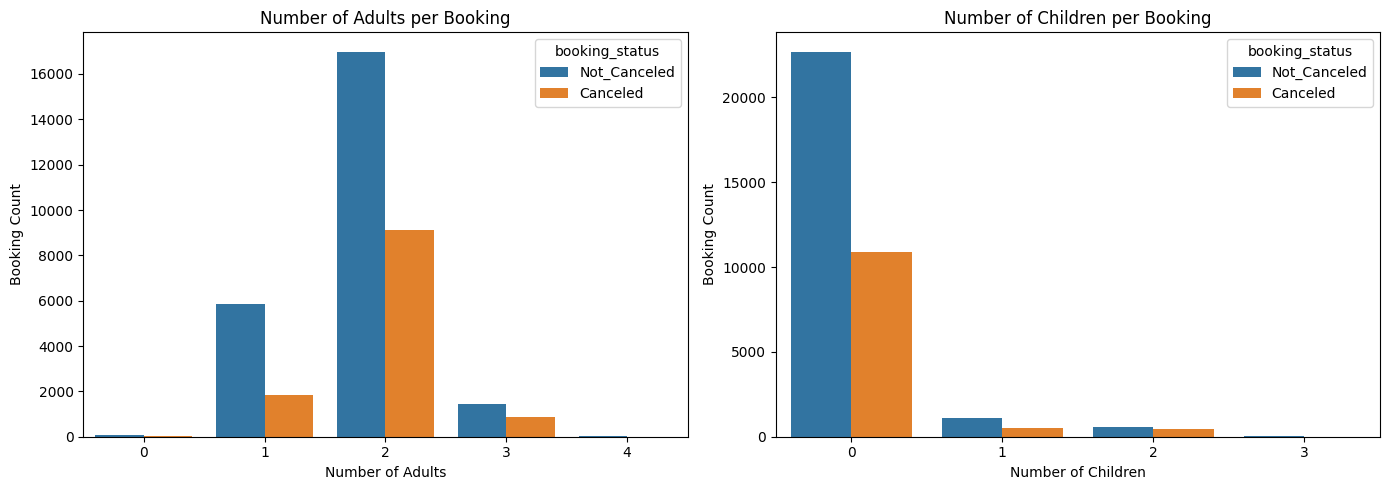

In [ ]:

# Plot distribution of adults and children
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.countplot(data=df, x='no_of_adults', hue='booking_status', ax=axes[0])
axes[0].set_title('Number of Adults per Booking')
axes[0].set_xlabel('Number of Adults')
axes[0].set_ylabel('Booking Count')

sns.countplot(data=df, x='no_of_children', hue='booking_status', ax=axes[1])
axes[1].set_title('Number of Children per Booking')
axes[1].set_xlabel('Number of Children')
axes[1].set_ylabel('Booking Count')

plt.tight_layout()
plt.show()


/tmp/ipykernel_37873/76946357.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cancellation_rate, x='total_guests', y='booking_status', palette='coolwarm')


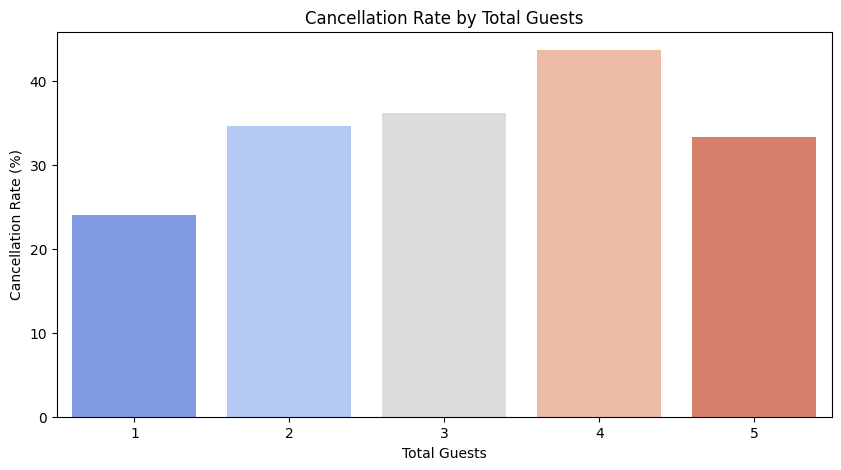

In [ ]:
# Create a total guests column
df['total_guests'] = df['no_of_adults'] + df['no_of_children']

# Calculate cancellation rate per total guests
cancellation_rate = df.groupby('total_guests')['booking_status'].apply(lambda x: (x=='Canceled').mean()*100).reset_index()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=cancellation_rate, x='total_guests', y='booking_status', palette='coolwarm')
plt.title('Cancellation Rate by Total Guests')
plt.xlabel('Total Guests')
plt.ylabel('Cancellation Rate (%)')
plt.show()


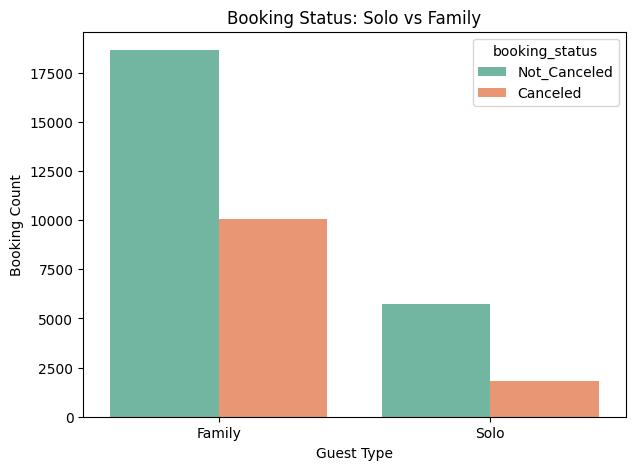

In [ ]:
# Define Family vs Solo
df['guest_type'] = df['total_guests'].apply(lambda x: 'Solo' if x==1 else 'Family')

# Plot booking status by guest type
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='guest_type', hue='booking_status', palette='Set2')
plt.title('Booking Status: Solo vs Family')
plt.xlabel('Guest Type')
plt.ylabel('Booking Count')
plt.show()

# Conclusions

- **Typical reservation:** Most bookings are for **2 adults and 0 children** (single most common profile).  
- **Absolute counts:** Families (multi-person bookings) account for the majority of bookings and therefore the majority of cancellations in absolute numbers.  
- **Cancellation probability rises with group size:**  
  - Solo bookings have the **lowest cancellation rate**.  
  - Cancellation rate increases for **2 → 3 → 4 total guests** (peak around 3–4 guests).  
- **Children:** Most bookings have 0 children; bookings with children are less frequent but show **non-trivial cancellation counts** — family bookings are higher risk in both absolute and relative terms.  
- **Important caveat:** Absolute cancellation bars are influenced by booking volume — always compare **rates (cancellations / total)**, not only counts.


In [ ]:
df['total_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
df['total_guests'] = df['no_of_adults'] + df['no_of_children']


In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_guests,guest_type,total_nights
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,...,Offline,0,0,0,65.00,0,Not_Canceled,2,Family,3
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,...,Online,0,0,0,106.68,1,Not_Canceled,2,Family,5
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,...,Online,0,0,0,60.00,0,Canceled,1,Solo,3
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,...,Online,0,0,0,100.00,0,Canceled,2,Family,2
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,...,Online,0,0,0,94.50,0,Canceled,2,Family,2


<Axes: xlabel='avg_price_per_room', ylabel='Count'>

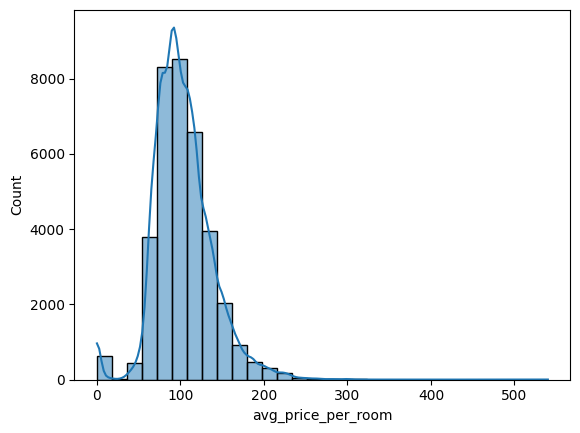

In [ ]:
sns.histplot(df, x='avg_price_per_room', bins=30, kde=True)
## Seems a little skewed to right

<Axes: xlabel='lead_time', ylabel='Count'>

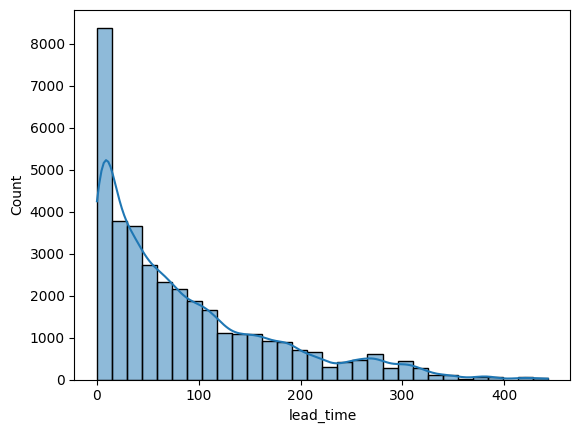

In [ ]:
sns.histplot(df, x="lead_time", bins=30, kde=True)
## this is also right skewed 

In [ ]:
skewness = df[num_cols].apply(lambda x: x.skew()).sort_values(ascending=False)

In [ ]:
skewness

no_of_previous_cancellations            25.198831
no_of_previous_bookings_not_canceled    19.249391
no_of_children                           3.968550
no_of_week_nights                        1.599478
lead_time                                1.292388
no_of_special_requests                   1.145107
no_of_weekend_nights                     0.737756
avg_price_per_room                       0.667020
arrival_date                             0.028713
no_of_adults                            -0.333288
arrival_month                           -0.348140
arrival_year                            -1.670052
dtype: float64

In [ ]:
cat_cols = ['type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

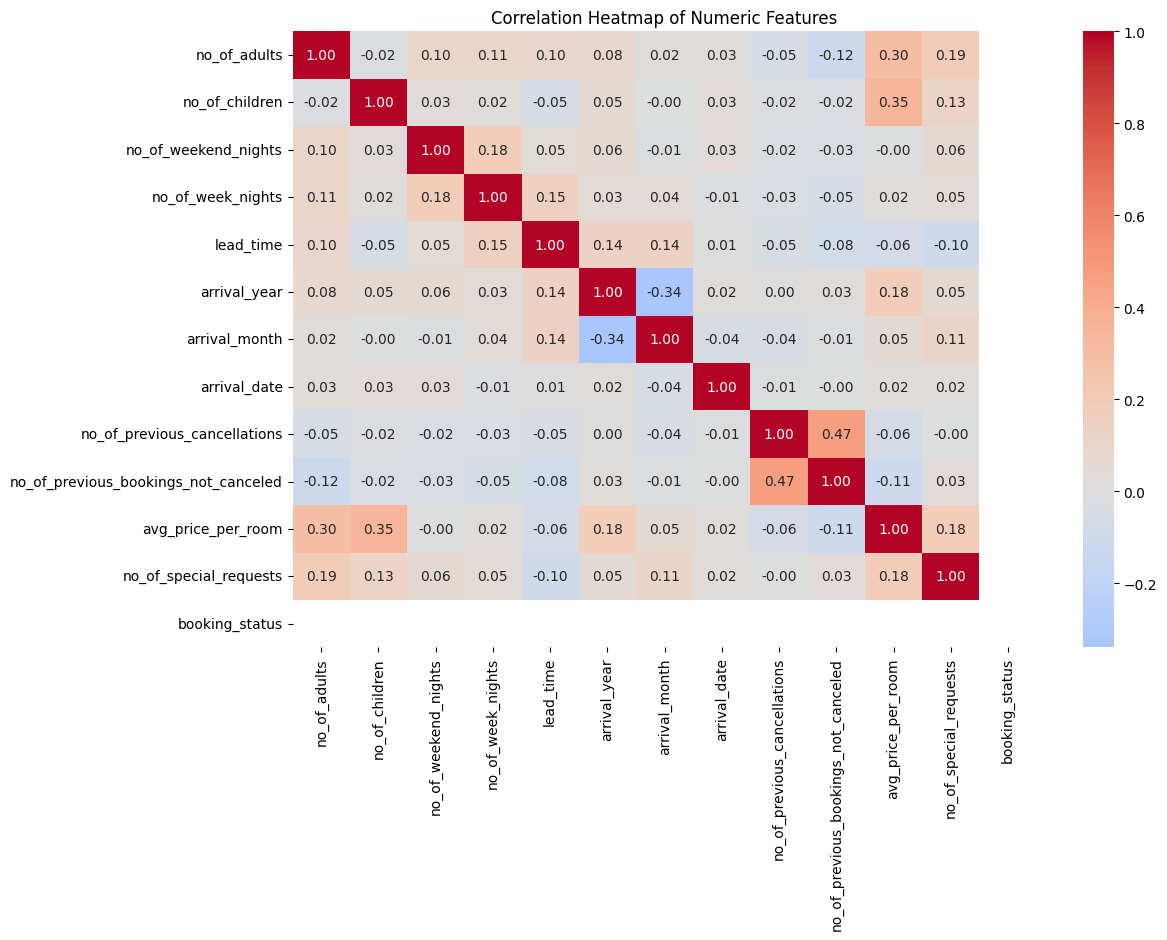

In [ ]:

df_corr = df.copy()
df_corr['booking_status'] = df_corr['booking_status'].map({'Canceled': 1, 'Not Canceled': 0})

# Compute correlation
corr_matrix = df_corr[num_cols + ['booking_status']].corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

From the observation, we have **categorical features** which are **ordinal in nature**, so I will be using **Ordinal Encoder** on them.  

Also from correalation heatmap we can say there is **no multicollinearity** amoungs the features. Also correlation  between features and target is also low. 

As some of the features are skewed to the right and have some outlier, maybe this are fradualent so i decided to keep and and apply transformation and use algorithem which are robust to outliers

The features need to be **scaled and normalized**, as I have some **outliers** and **imbalanced data**. I will start with **RobustScaler** and use **Random Forest (RF)** and **XGBoost** as my algorithms.   

Depending on the my F1 score , I will decide on handling the **imbalanced data** with **SMOTE**.


In [ ]:
# Remove known outlier from the dataset
df_1=data.copy()
df_1=df_1.drop(index=df[(df['no_of_children'] == 9) | (df['no_of_children'] == 10)].index)

In [ ]:
df_1.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df_1.drop_duplicates(inplace=True)

In [ ]:
df_1.drop(columns=['Booking_ID'], inplace=True)

In [ ]:
X = df_1.drop(columns=['booking_status'])
y = df_1['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
9078,2,0,1,2,Meal Plan 1,0,Room_Type 1,273,2018,5,13,Offline,0,0,0,95.00,0
36042,2,0,1,3,Meal Plan 1,0,Room_Type 1,158,2018,6,30,Online,0,0,0,90.95,1
5929,2,0,2,1,Meal Plan 1,0,Room_Type 1,59,2018,11,26,Online,0,0,0,93.60,1
6928,1,0,0,2,Meal Plan 1,0,Room_Type 1,5,2018,10,25,Aviation,0,0,0,95.00,0
34607,2,2,2,4,Meal Plan 1,0,Room_Type 6,54,2018,4,29,Online,0,0,0,187.85,0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder,RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer



In [ ]:

num_trans=RobustScaler()
cat_trans=OrdinalEncoder()

preprocessing = ColumnTransformer(
    [
        ('OrdinalEncoder', cat_trans, cat_cols),
        ('RobustScaler', num_trans, num_cols)
    ]
)

In [ ]:
target_trans=LabelEncoder() 
y_train=target_trans.fit_transform(y_train)
y_test=target_trans.transform(y_test)

In [ ]:
X_train=preprocessing.fit_transform(X_train)
X_test=preprocessing.transform(X_test)


In [ ]:
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.12217166,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.22315028,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.15707785,  1.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.17702425,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.3216356 ,  0.        ],
       [ 0.        ,  0.        ,  5.        , ...,  0.        ,
         2.46836627,  0.        ]], shape=(29020, 17))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
models={

    'RandomForest':RandomForestClassifier(),
    'DecisionTree':DecisionTreeClassifier(),
    "XGBoost":XGBClassifier()

}

for i in range(len(list(models))):
    model =list(models.values())[i]
    model.fit(X_train,y_train)

    y_test_pred=model.predict(X_test)



    print(list(models.keys())[i])

    print(f'cm:\n{confusion_matrix(y_test, y_test_pred)}')
    print(f'report:\n{classification_report(y_test, y_test_pred)}')



RandomForest
cm:
[[1964  413]
 [ 231 4647]]
report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      2377
           1       0.92      0.95      0.94      4878

    accuracy                           0.91      7255
   macro avg       0.91      0.89      0.90      7255
weighted avg       0.91      0.91      0.91      7255

DecisionTree
cm:
[[1923  454]
 [ 483 4395]]
report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      2377
           1       0.91      0.90      0.90      4878

    accuracy                           0.87      7255
   macro avg       0.85      0.85      0.85      7255
weighted avg       0.87      0.87      0.87      7255

XGBoost
cm:
[[1915  462]
 [ 260 4618]]
report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      2377
           1       0.91      0.95      0.93      4878

    accuracy                   

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_test_pred=lr.predict(X_test)


f1_score: 0.8075262733561549


In [ ]:
print(f'cm:\n{confusion_matrix(y_test, y_test_pred)}')
print(f'report:\n{classification_report(y_test, y_test_pred)}')

cm:
[[1498  879]
 [ 482 4396]]
report:
              precision    recall  f1-score   support

           0       0.76      0.63      0.69      2377
           1       0.83      0.90      0.87      4878

    accuracy                           0.81      7255
   macro avg       0.79      0.77      0.78      7255
weighted avg       0.81      0.81      0.81      7255

